In [ ]:
#Data mining project_Halah Bahanshal

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
import warnings
warnings.filterwarnings('ignore')  # supress warnings
sns.set_style('whitegrid')
from pickle import dump, load
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
import statsmodels.discrete.discrete_model as sm

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.stats import ttest_ind, wilcoxon, shapiro, mannwhitneyu

In [3]:

# load all data
dt = pd.read_excel('Concrete_Data.xls')

In [4]:
#Cement (component 1) -- quantitative -- kg in a m3 mixture
#Blast Furnace Slag (component 2) kg in a m3 mixture -- Input Variable 
#Fly Ash (component 3) kg in a m3 mixture -- Input Variable 
#Water (component 4) kg in a m3 mixture -- Input Variable 
#Superplasticizer (component 5) kg in a m3 mixture -- Input Variable 
#Coarse Aggregate (component 6) kg in a m3 mixture -- Input Variable 
#Fine Aggregate (component 7) kg in a m3 mixture -- Input Variable 
#Age -- quantitative -- Day (1~365) -- Input Variable 
#Concrete compressive strength  MPa -- Output Variable 


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
dt.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
#The dataset consists of 1030 instances with 9 attributes. 
#There are 8 input variables and 1 output variable. 
#Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). 
#The target variable is Concrete Compressive Strength measured in (MPa — Mega Pascal). 


In [8]:
print("Data set contains {} rows and {} columns".format(dt.shape[0], dt.shape[1]))

Data set contains 1030 rows and 9 columns


In [9]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(dt.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

dt = dt.rename(columns=mapper)

In [10]:
dt.head()


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [11]:
dt.describe(include = 'all')

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


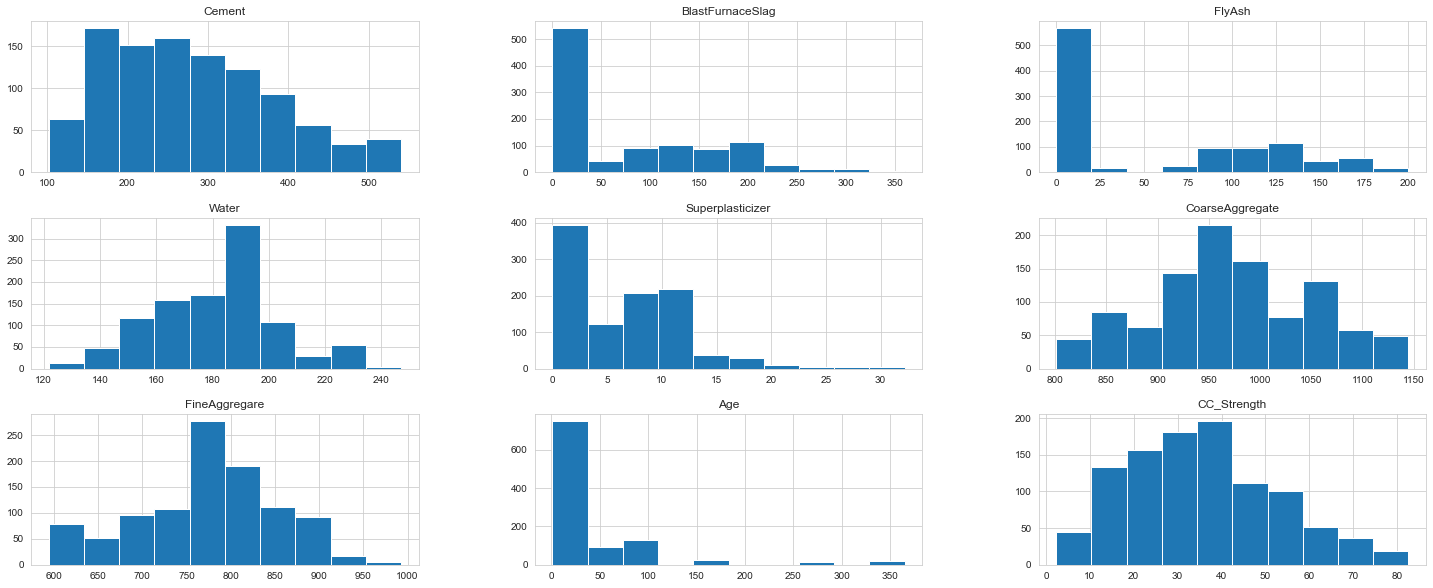

In [12]:
plt.rcParams['figure.figsize']=25,10               #Selecting size and width of the plot
dt.hist()                                 #Choosing bar/histogram for visualization
plt.show()

In [13]:
#No missing value so replace 800 in coarseaggregate with na values
dt['CoarseAggregate']= dt['CoarseAggregate'].replace(800,np.nan)

mean_price = dt['CoarseAggregate'].mean()

dt['CoarseAggregate'].fillna(mean_price, inplace =True)

dt.head()


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


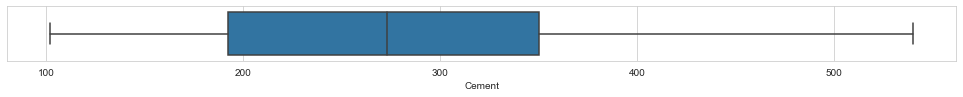

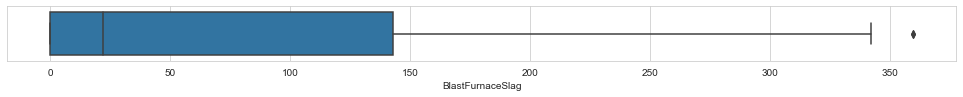

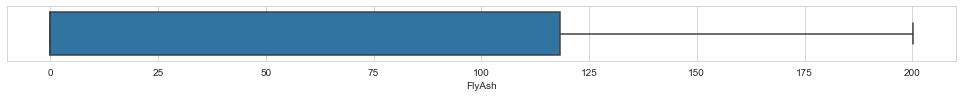

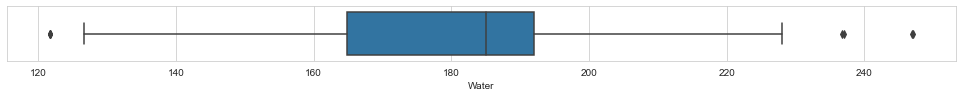

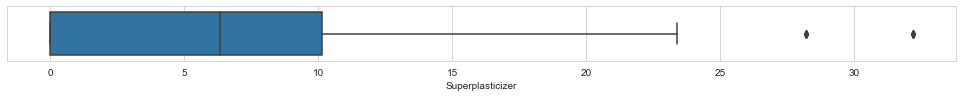

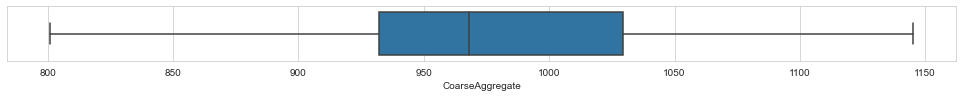

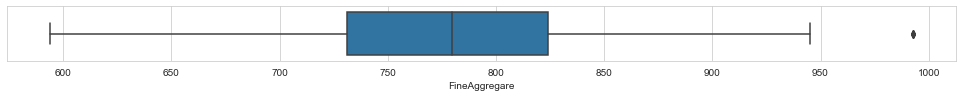

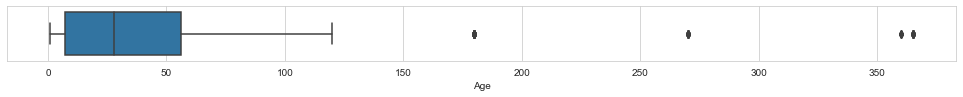

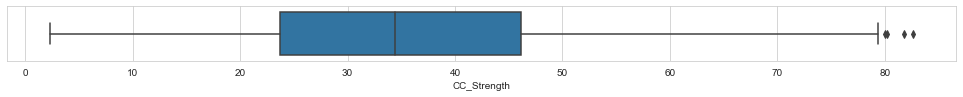

In [14]:
import matplotlib.pyplot as plt

for column in dt:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=dt, x=column)

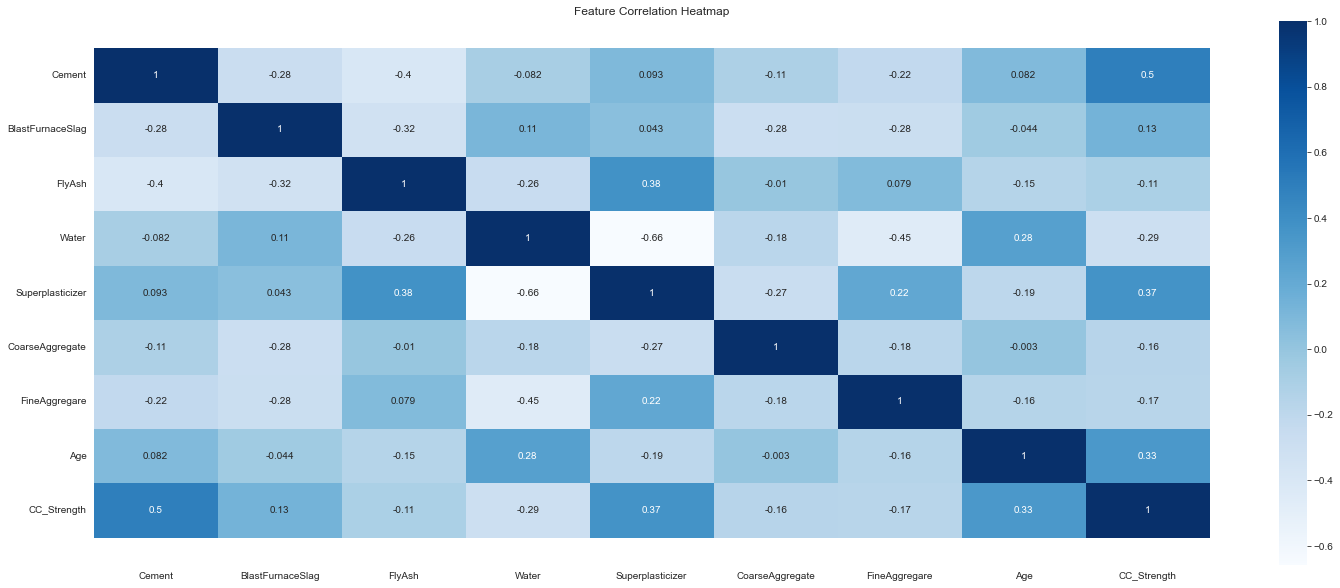

In [15]:
corr = dt.corr()

sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
dt.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Text(0.5, 1.0, 'Compressive Strength Distribution')

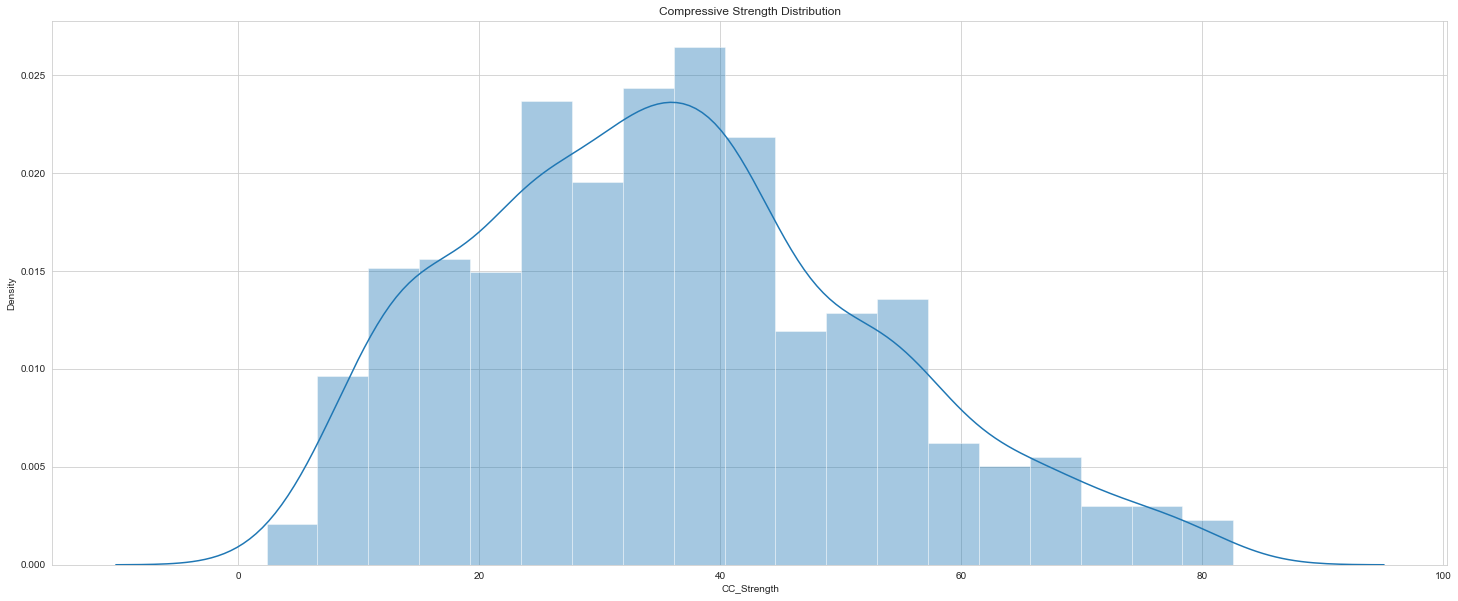

In [17]:
ax = sns.distplot(dt.CC_Strength)
ax.set_title("Compressive Strength Distribution")

In [18]:
dt.insert(9, "Water to cement Ratio", dt['Water']/dt['Cement'])

In [19]:
dt.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength,Water to cement Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767


In [20]:
dt.describe(include = 'all')

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength,Water to cement Ratio
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836,0.748269
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679,0.314005
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808,0.266893
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115,0.533333
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774,0.675349
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287,0.935014
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225,1.882353


In [21]:
dt.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength,Water to cement Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767


In [22]:
#Independent variables
X = dt.iloc[:,:-1]
#dependent variable
y = dt.iloc[:,-1] 

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(X_train,y_train)
score = lr.score(X_test,y_test)
print('predicted score is : {}'.format(score))
print('..................................')
y_predict = lr.predict(X_test)
print('mean_sqrd_error is ==',mean_squared_error(y_test,y_predict))
rms = np.sqrt(mean_squared_error(y_test,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predcted score is : 0.8761958388758458
..................................
mean_sqrd_error is == 0.012560991283705055
root mean squared error is == 0.11207582827579306


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_predict)),mean_squared_error(y_test, y_predict),
            mean_absolute_error(y_test, y_predict), r2_score(y_test, y_predict)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 0.11 		 0.01 		0.08 		0.88


Text(0.5, 1.0, 'Linear Regression')

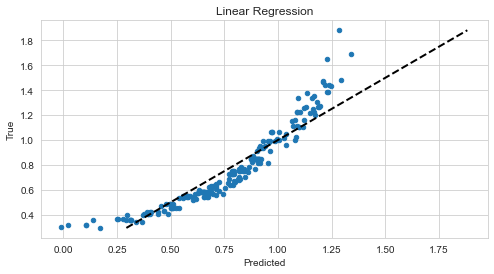

In [142]:
fig, (ax1) = plt.subplots(1, figsize=(8,4))
ax1.scatter(y_predict, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 


In [118]:
#SVM

In [119]:

dt["Concrete strong or weak"] =np.where(dt["CC_Strength"]> 45.66,1,0)

In [120]:
dt.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength,Water to cement Ratio,Concrete strong or weak
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714,0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714,0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767,0


In [121]:
X2=dt.iloc[:,[0,1,2,3,4,5,6,7]]
X3=dt["Cement"], dt["Age"]
y2=dt["Concrete strong or weak"]

In [122]:
X4=X2.to_numpy()
y4=y2.to_numpy()

In [123]:
X4

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [124]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X4, y4, test_size=0.3, random_state=2)

In [125]:
np.size(X2_test,0)

309

In [126]:
np.size(X2_test,1)

8

print(y4)

In [127]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = clf.predict(X2_test)

In [128]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 0.8090614886731392


In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y2_test, y2_pred)
print(cm)
accuracy_score(y2_test, y2_pred)

[[210  29]
 [ 30  40]]


0.8090614886731392

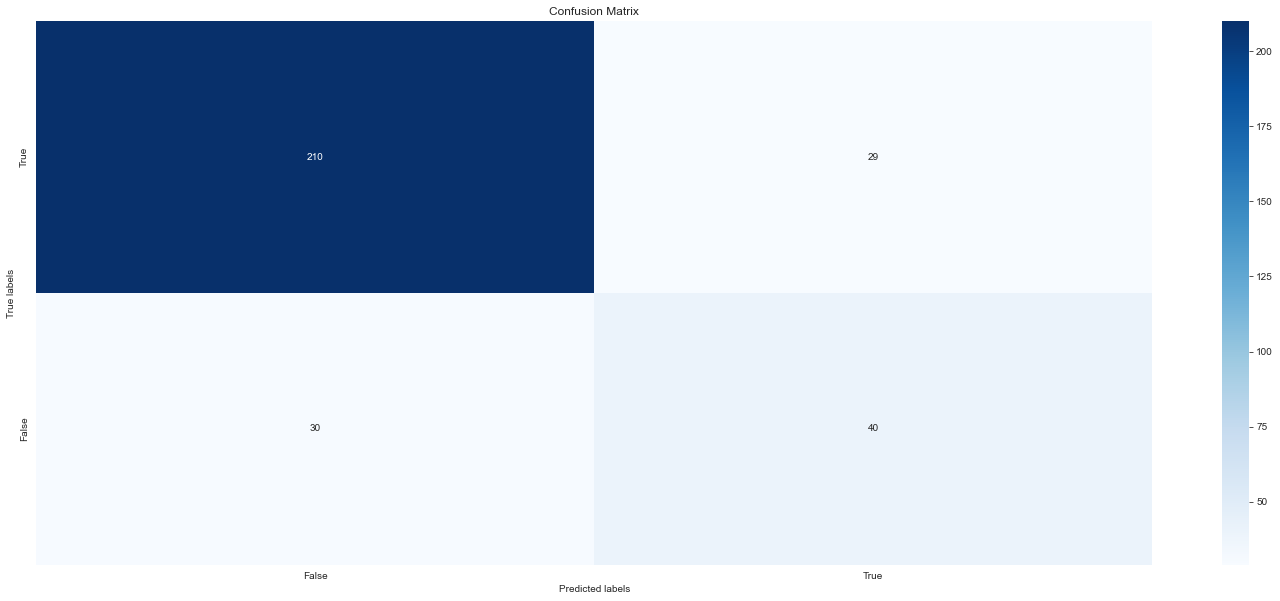

In [84]:

ax.set_title('confusion_matrix');
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False','True']); ax.yaxis.set_ticklabels(['True','False']);
plt.show()

In [85]:
#Logistic Regression

In [131]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X2_train,y2_train)

#
y2_pred=logreg.predict(X2_test)

In [132]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y2_test, y2_pred)
cnf_matrix

array([[207,  32],
       [ 31,  39]])

Text(0.5, 637.6, 'Predicted label')

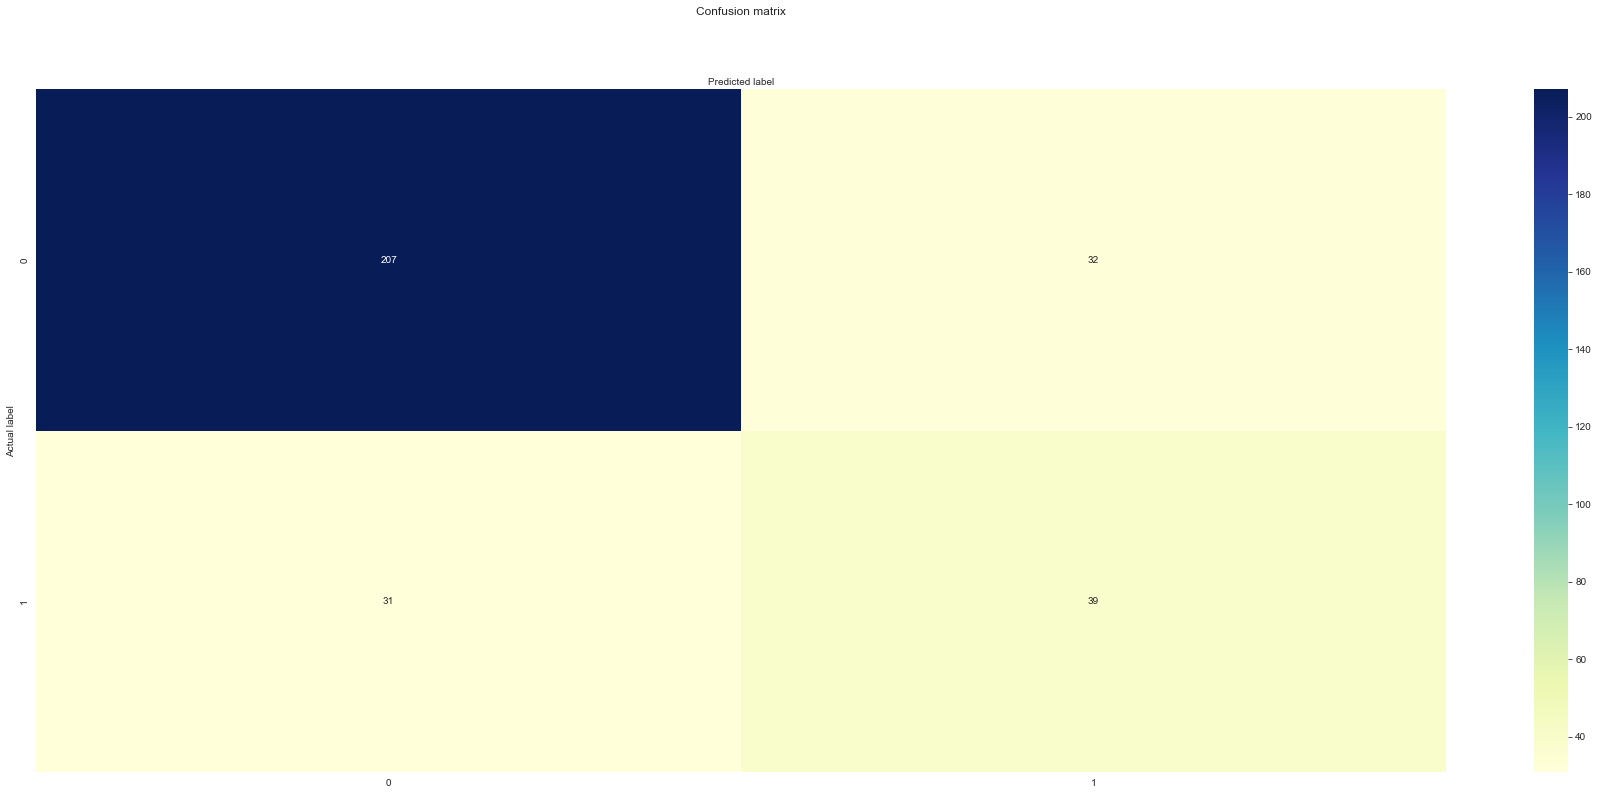

In [133]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [89]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))

Accuracy: 0.7961165048543689
Precision: 0.5492957746478874
Recall: 0.5571428571428572


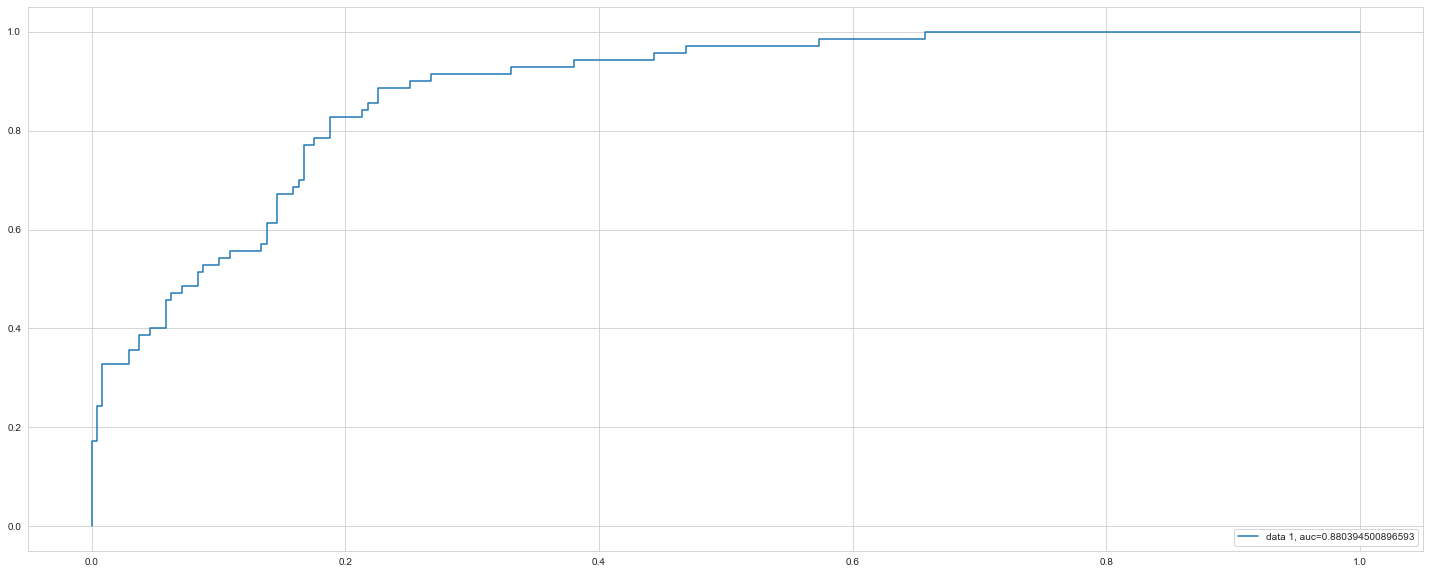

In [134]:
y2_pred_proba = logreg.predict_proba(X2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y2_test,  y2_pred_proba)
auc = metrics.roc_auc_score(y2_test, y2_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
#Thankyou